In [1]:
from classiq import QArray, X, H, qfunc, Output, QBit, allocate, create_model, show, synthesize, execute, write_qmod, hadamard_transform, control, within_apply, inplace_prepare_state, repeat, SWAP, QNum

size = 4  # 4 qubits for 16 nodes

@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

@qfunc
def diffuser_oracle(aux: QBit, x: QNum):
    aux ^= (x != 0)

@qfunc
def zero_diffuser(x: QNum):
    aux = QBit('aux')
    allocate(1, aux)
    within_apply(compute=lambda: prepare_minus(aux),
                 action=lambda: diffuser_oracle(aux, x))

def W_iteration(i: int, vertices: QNum, adjacent_vertices: QNum):
    prob = [0.0] * (2 ** size)
    if i > 0 and i < 2 ** size - 1:
        prob[i - 1] = 0.5
        prob[i + 1] = 0.5
    elif i == 0:
        prob[i + 1] = 1.0

    elif i == 2 ** size - 1:
        prob[i - 1] = 1.0
    print(f'State={i}, prob vec={prob}')
    
    control(ctrl=vertices == i,
            operand=lambda: within_apply(
                compute=lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
                action=lambda: zero_diffuser(adjacent_vertices)))

@qfunc
def W_operator(vertices: QNum, adjacent_vertices: QNum):
    for i in range(2 ** size):
        W_iteration(i, vertices, adjacent_vertices)

@qfunc
def edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices + adjacent_vertices) % 2) == 1)

@qfunc
def bitwise_swap(x: QArray[QBit], y: QArray[QBit]):
    repeat(count=x.len,
           iteration=lambda i: SWAP(x[i], y[i]))
    
@qfunc 
def S_operator(vertices: QNum, adjacent_vertices: QNum):
    res = QBit('res')
    edge_oracle(res, vertices, adjacent_vertices)
    control(ctrl= res == 1,
        operand= lambda: bitwise_swap(vertices, adjacent_vertices))


@qfunc
def main(vertices: Output[QNum], adjacent_vertices: Output[QNum]):
    allocate(size, vertices)
    hadamard_transform(vertices)
    allocate(size, adjacent_vertices)
    W_operator(vertices, adjacent_vertices)
    S_operator(vertices, adjacent_vertices)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)


State=0, prob vec=[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=1, prob vec=[0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=2, prob vec=[0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=3, prob vec=[0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=4, prob vec=[0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=5, prob vec=[0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=6, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=7, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=8, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
State=9, prob vec=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]
State=10, 

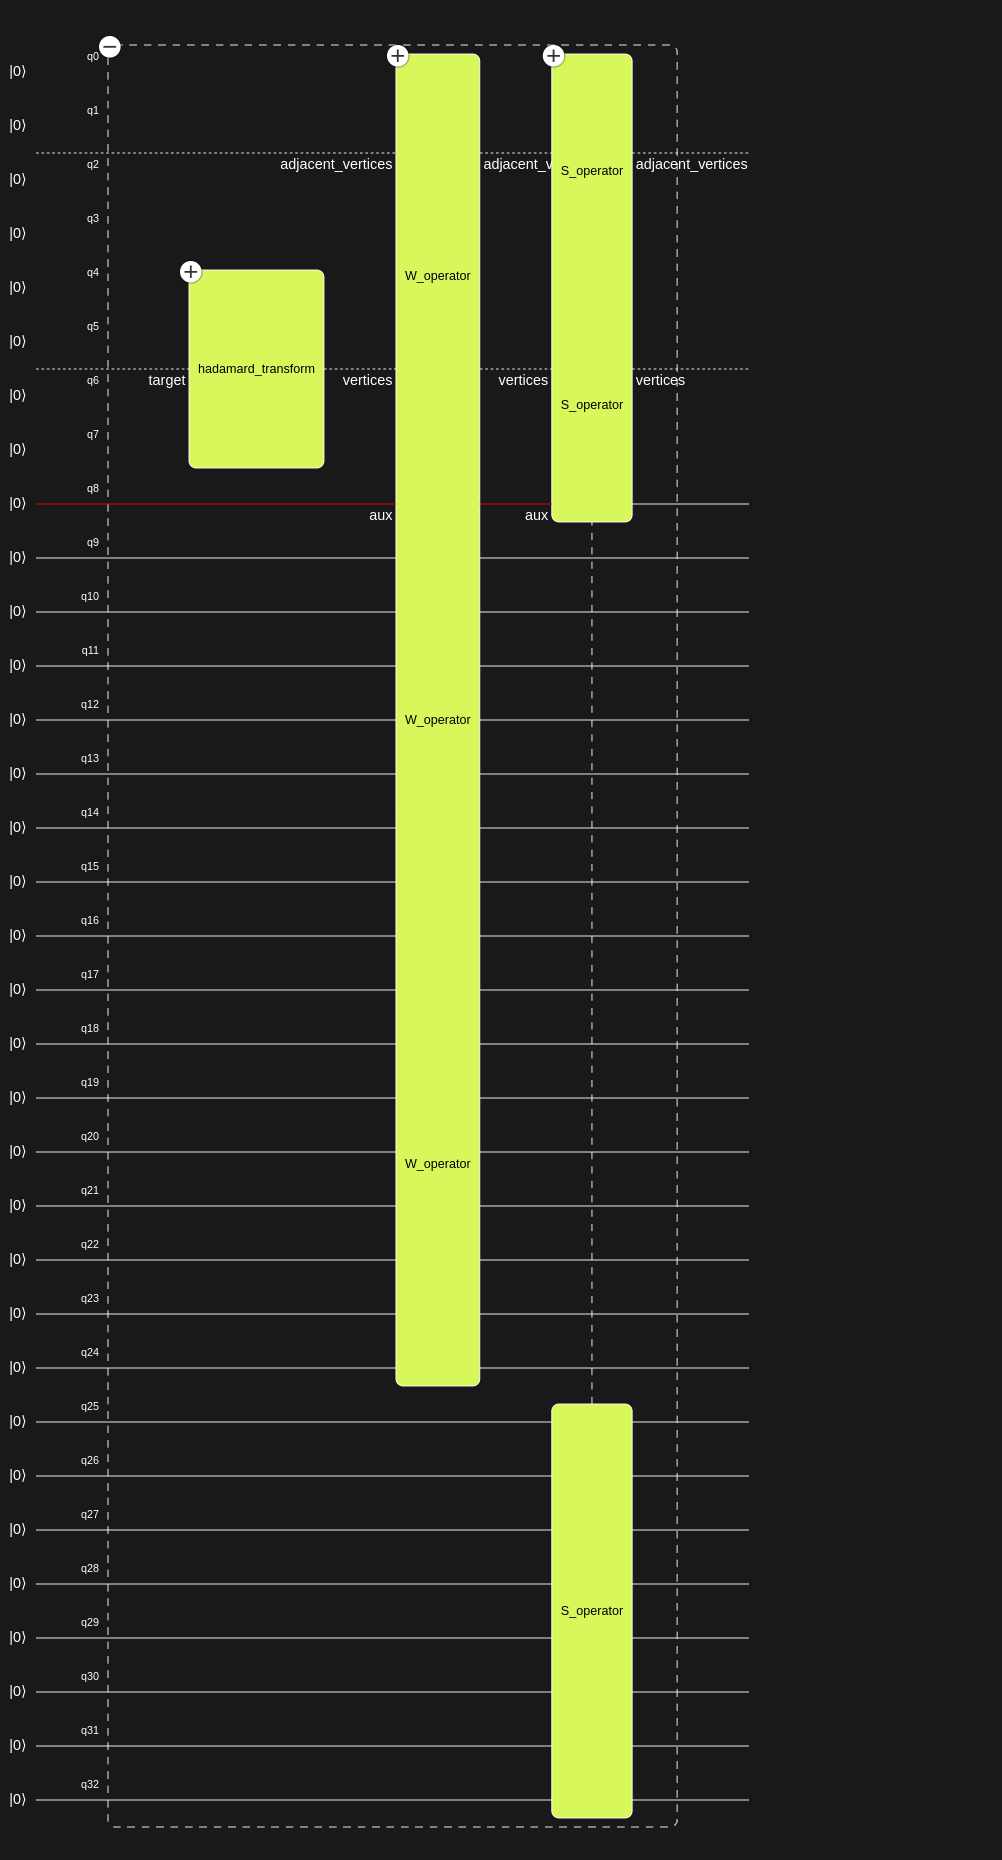